# ToDO: Error analysis on the baseline model

## Outline
   
- **Get feature importance by the model** 

In [2]:
import numpy  as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

from scripts.preprocess import get_feature_list_from_text_excluding_target
from xgboost import plot_importance
from scripts.model import get_model, get_prediction, save_model, load_saved_model

In [3]:
full_data = pd.read_csv(fr"data/prepared_data_for_modeling.csv")

target = 'next_hour_good_performance'
sample_features = get_feature_list_from_text_excluding_target(fr"data/feature_lists_for_modeling.txt",
                                                              target) 
                                                          
training_data = full_data[full_data['first_24_hour']][sample_features+[target]]                                              
X_train = np.ascontiguousarray(training_data[sample_features])
y_train = np.ascontiguousarray(training_data[target])

test_data = full_data[full_data['test_set']][sample_features+[target]]
X_test = np.ascontiguousarray(test_data[sample_features])
y_test = np.ascontiguousarray(test_data[target])

del training_data, test_data

Successfully returned list from:  data/feature_lists_for_modeling.txt


Take full data for optimization

In [4]:
X = full_data[full_data['first_24_hour']][sample_features]
y = full_data[full_data['first_24_hour']][target]

In [11]:
sample_features

['spend',
 'purchase',
 'impressions',
 'hour',
 'good_performance',
 'dayofweek',
 'custom_conversion_rate',
 'conversion_rate',
 'clicks',
 'campaign_id']

Load Best Model

In [5]:
xgb_model = load_saved_model(fr"trained_models", 'xgb_model')

xgb_model found at trained_models\xgb_model.


### Get Important Features

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

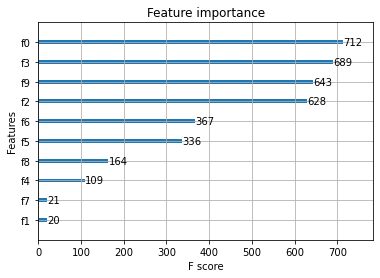

In [11]:
plot_importance(xgb_model)

Fitting the model again to get the proper labels of the corresponding feature. Refitting doesn't effect the result 

[22:35:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

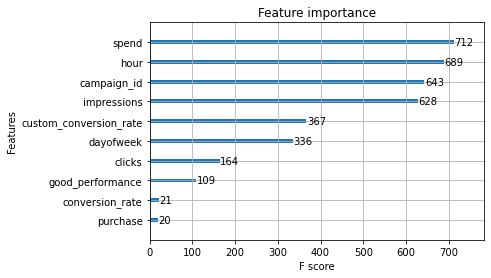

In [14]:
xgb_model.fit(X,y)
ax = plot_importance(xgb_model)
ax.figure.savefig( f"plots/xgb_feature_importance.jpg", dpi=300, bbox_inches = "tight")